In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Data resource - National Mammal Atlas Project.csv')
df.sample(5)

,Scientific name,Common name,Species ID (TVK),Taxon Rank,Start date,Start date day,Start date month,Start date year,Latitude (WGS84),Longitude (WGS84),...,Survey key,Kingdom,Phylum,Class,Order,Family,Genus,Country,State/Province,Vitality
10192,Castor fiber,Beaver,NBNSYS0000005107,species,03/07/2020,3,7,2020,51.194489,1.576786,...,iRecord | General data,Animalia,Chordata,Mammalia,Rodentia,Castoridae,Castor,United Kingdom,England,NaN
41034,Sciurus carolinensis,Eastern Grey Squirrel,NHMSYS0000332764,species,23/06/2019,23,6,2019,52.913142,-2.387337,...,iRecord | General data,Animalia,Chordata,Mammalia,Rodentia,Sciuridae,Sciurus,United Kingdom,England,NaN
153832,Sciurus carolinensis,Eastern Grey Squirrel,NHMSYS0000332764,species,25/07/2017,25,7,2017,52.564361,-2.885843,...,iRecord | General data,Animalia,Chordata,Mammalia,Rodentia,Sciuridae,Sciurus,United Kingdom,England,NaN
138931,Pipistrellus pipistrellus,Common Pipistrelle,NHMSYS0020001355,species,17/05/2009,17,5,2009,53.343459,-1.539601,...,iRecord | Import,Animalia,Chordata,Mammalia,Chiroptera,Vespertilionidae,Pipistrellus,United Kingdom,England,NaN
92477,Capreolus capreolus,Roe Deer,NHMSYS0000080203,species,29/11/2016,29,11,2016,53.611328,-2.457184,...,iRecord | General data,Animalia,Chordata,Mammalia,Artiodactyla,Cervidae,Capreolus,United Kingdom,England,NaN


In [3]:
df_copy = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227322 entries, 0 to 227321
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Scientific name                     227322 non-null  object 
 1   Common name                         227123 non-null  object 
 2   Species ID (TVK)                    227322 non-null  object 
 3   Taxon Rank                          227322 non-null  object 
 4   Start date                          227322 non-null  object 
 5   Start date day                      227322 non-null  int64  
 6   Start date month                    227322 non-null  int64  
 7   Start date year                     227322 non-null  int64  
 8   Latitude (WGS84)                    227321 non-null  float64
 9   Longitude (WGS84)                   227321 non-null  float64
 10  Coordinate uncertainty (m)          227321 non-null  float64
 11  Identification verificatio

In [5]:
df.isna().sum() / len(df) * 100

Scientific name                         0.000000
Common name                             0.087541
Species ID (TVK)                        0.000000
Taxon Rank                              0.000000
Start date                              0.000000
Start date day                          0.000000
Start date month                        0.000000
Start date year                         0.000000
Latitude (WGS84)                        0.000440
Longitude (WGS84)                       0.000440
Coordinate uncertainty (m)              0.000440
Identification verification status      0.000000
Basis of record                         0.000000
Survey key                              0.000000
Kingdom                                 0.000000
Phylum                                  0.000000
Class                                   0.000000
Order                                   0.059827
Family                                  0.647980
Genus                                   0.877170
Country             

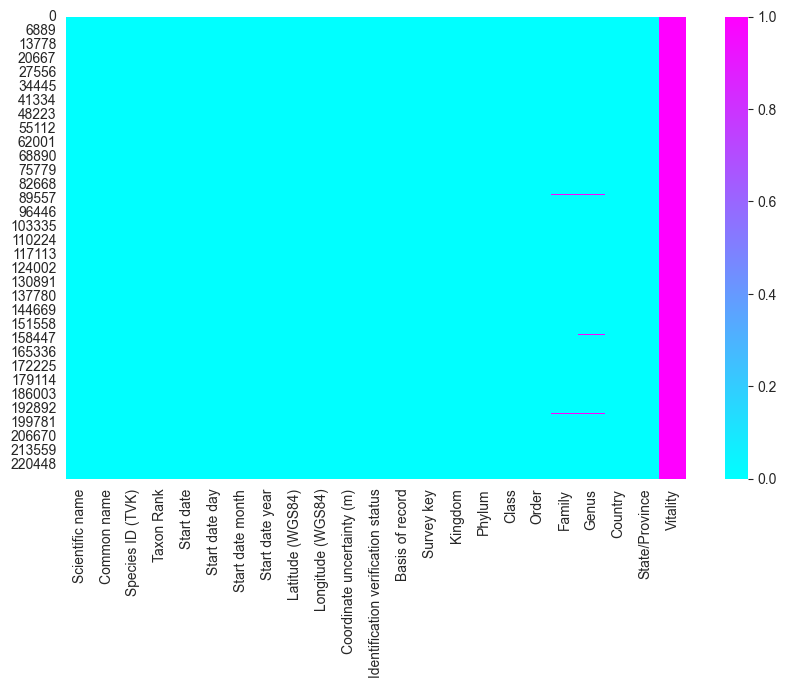

In [6]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df.isna(), cmap='cool')
plt.show()

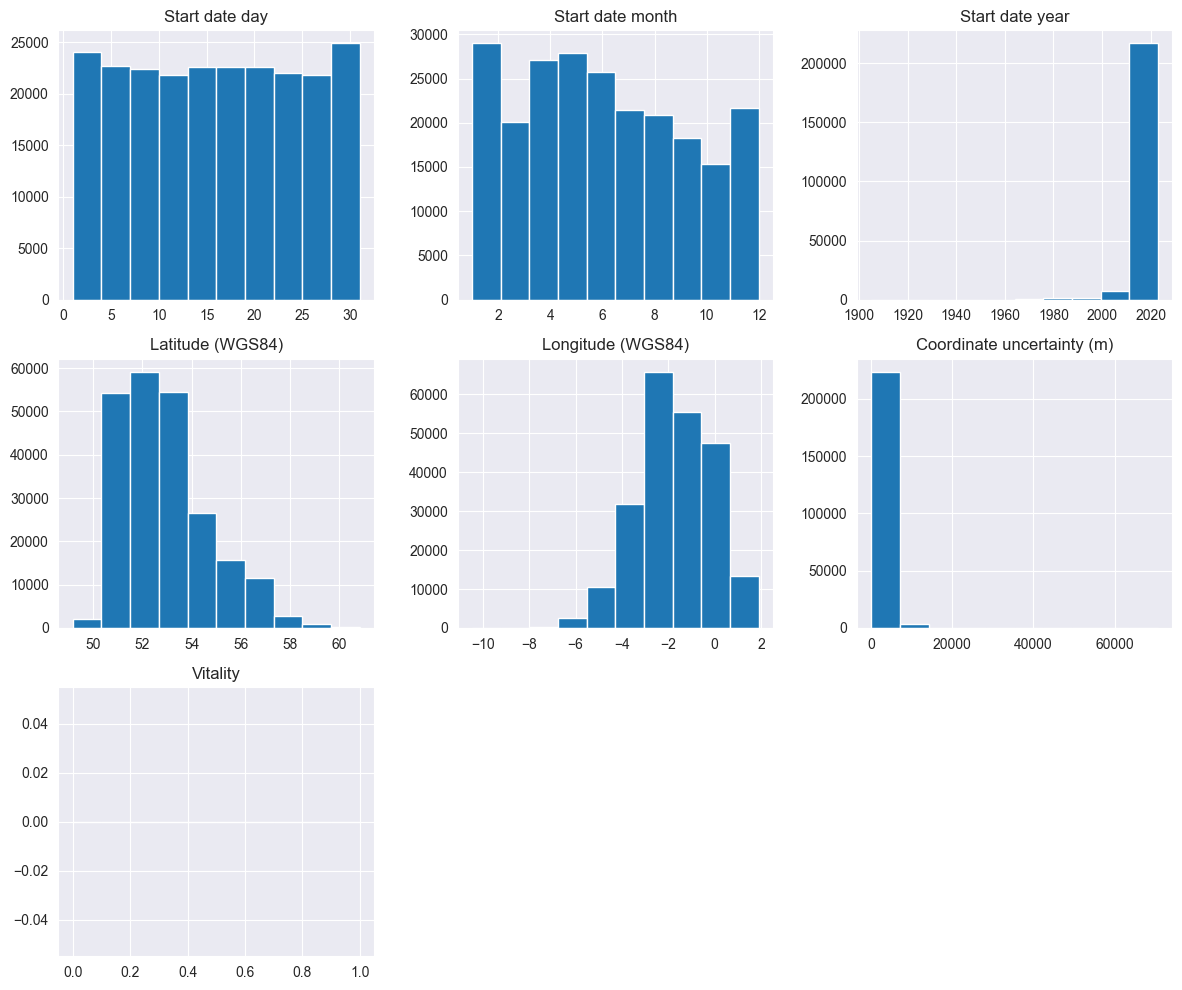

In [7]:
df.hist(bins=10, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [8]:
df.duplicated().sum()

5936

In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
df.drop(['Taxon Rank', 'Start date day', 'Start date month', 'Start date', 'Coordinate uncertainty (m)', 'Identification verification status', 'Survey key', 'Kingdom', 'Phylum', 'Class', 'Vitality'], axis=1, inplace=True)
df.columns

Index(['Scientific name', 'Common name', 'Species ID (TVK)', 'Start date year',
       'Latitude (WGS84)', 'Longitude (WGS84)', 'Basis of record', 'Order',
       'Family', 'Genus', 'Country', 'State/Province'],
      dtype='object')

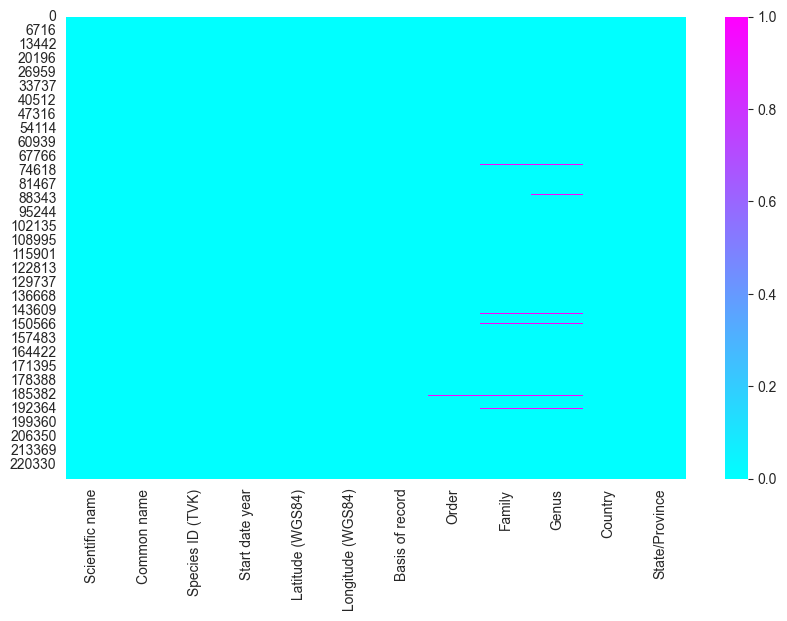

In [11]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df.isna(), cmap='cool')
plt.show()     

In [12]:
df.isna().sum() / len(df) * 100

Scientific name      0.000000
Common name          0.088985
Species ID (TVK)     0.000000
Start date year      0.000000
Latitude (WGS84)     0.000452
Longitude (WGS84)    0.000452
Basis of record      0.000000
Order                0.060979
Family               0.650899
Genus                0.885332
Country              0.102988
State/Province       0.102988
dtype: float64

In [13]:
df_copy2 = df.copy()

In [14]:
df_copy3 = df_copy2
# Renommer les colonnes dans df_copy3
df_copy3.rename(columns={'Species ID (TVK)': 'Species_ID',
                         'Latitude (WGS84)': 'Latitude',
                         'Longitude (WGS84)': 'Longitude',
                         'Basis of record': 'Basis_of_record',
                         'State/Province': 'State',
                         'Start date year': 'Start_Year',
                         'Common name': 'Common_name',
                         'Scientific name': 'Scientific_name'}, inplace=True)

# Vérifier les changements
print(df_copy3.info())
nom_fichier = 'National Mammal Atlas Project Clean.csv'

df_copy3.to_csv(nom_fichier, index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 221386 entries, 0 to 227321
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Scientific_name  221386 non-null  object 
 1   Common_name      221189 non-null  object 
 2   Species_ID       221386 non-null  object 
 3   Start_Year       221386 non-null  int64  
 4   Latitude         221385 non-null  float64
 5   Longitude        221385 non-null  float64
 6   Basis_of_record  221386 non-null  object 
 7   Order            221251 non-null  object 
 8   Family           219945 non-null  object 
 9   Genus            219426 non-null  object 
 10  Country          221158 non-null  object 
 11  State            221158 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 22.0+ MB
None
